### Basic introduction to working with tabular data in python
Before getting started, make sure you have activated the `scrnaseq` environment which we created with mamba earlier on (you should have started the notebook server from within that environment). This is recommended because the packages we will need for this tutorial are already installed into that environment.

#### 1. Import the required packages

In [4]:
import numpy as np  # allows to manipulate arrays
import pandas as pd  # allows to work with tabular data
import matplotlib.pyplot as plt  # allows to plot
import seaborn as sns  # makes your plots look nicer and gives you advanced plotting options

#### 2. Download the dataset
You can download the .csv file of the dataset from here https://gist.github.com/slopp/ce3b90b9168f2f921784de84fa445651#file-penguins-csv (via the button Download ZIP at the top right, then unzip and move dataset to a project folder). 

This dataset contains measurements of penguins from different species – you can think of it as similar to a dataset on cells from different types, like what we will be working with later. 

An in depth educational analysis of the dataset can be found here https://allisonhorst.github.io/palmerpenguins/articles/intro.html for R and, with less detail, for python here https://github.com/mcnakhaee/palmerpenguins, but we recommend you refrain from looking at this too much now and rather find your own way to maximize learning.

#### 3. Loading and inspecting the data
The comments (lines which start with #, contain comments and are not executed as python code) contain step-by-step instructions to work with the penguin dataset. Add corresponding python code below each comment. For easier debugging and comparisons with other participants, we suggest you keep the suggested names.

In [35]:
# Load the penguin dataset
penguins = pd.read_csv("penguins.csv", index_col=0)

In [36]:
# Display the first few rows of the dataset
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
rowid,,,,,,,,
1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [37]:
# Get the dataset dimensions, i.e. the number of penguins in the dataset and the number of features
penguins.shape
penguins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 344 entries, 1 to 344
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 24.2+ KB


In [38]:
# For each feature, check the datatype - what do the resulting types mean?
penguins.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

In [39]:
# For caterogrical data, the categories used can be displayed like this:
print(penguins['species'].unique())
# Print to screen and inspect the categories for all categorical data types
print(penguins['island'].unique())
print(penguins['sex'].unique())

['Adelie' 'Gentoo' 'Chinstrap']
['Torgersen' 'Biscoe' 'Dream']
['male' 'female' nan]


There seems to be "nan" as a sex. What does this mean?

In [40]:
# search for missing data entries in the dataframe. How many values are missing?
penguins.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

### 3.1 Questions
Based on the analysis above, discuss with your neighbor and note down the answers to the following questions into the notebook:
1. How many penguins and features do we have in this dataset?
2. What are te different penguin species (think: cell types)?
3. Are there any missing values in the dataset that we need to handle? Do you have preliminary ideas on how to handle them?
4. What are the numerical features in this dataset which we can analyze?

### 4. Preprocessing the data
As above, you will find instructions written as comments below which you have to turn into python code. The steps in this section help us prepare to data for the actual analysis.

In [41]:
# Remove all rows with missing entries from the dataframe
penguins_complete = penguins.dropna()

In [42]:
# Measure the size of the new dataframe
penguins_complete.shape

(333, 8)

In [44]:
# Select all numerical columns which have to do with body measurements and transfer them to a separate dataframe
penguins_numerical = penguins_complete[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]

In [45]:
# Select the species labels and extract them into a separate object
species_labels = penguins_complete['species']

In [47]:
penguins_numerical

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
rowid,,,,
1,39.1,18.7,181.0,3750.0
2,39.5,17.4,186.0,3800.0
3,40.3,18.0,195.0,3250.0
5,36.7,19.3,193.0,3450.0
6,39.3,20.6,190.0,3650.0
...,...,...,...,...
340,55.8,19.8,207.0,4000.0
341,43.5,18.1,202.0,3400.0
342,49.6,18.2,193.0,3775.0


### 4.1 Questions
Discuss with your neighbor and answer in writing.
1. How many penguins were discarded by the data clean-up step which required all features to be present?
2. Thinking ahead, why would we need a separate object with numerical measurements only? 

### 5. Data transformations
In this section, we will explore some basic statistics of the numerical features and use them to normalize our data. As above, please follow the instructions in the comments. We will standardize each feature to its z-score (https://en.wikipedia.org/wiki/Standard_score) in order to make features comparable across units and orders of magnitude. This is a common preprocessing step for numerical data across different data types as otherwise, a feature with high values (say, penguin height in cm) might dominate a feature with low values (say, penguin weight in kg) in downstream analyses.

In [52]:
# Calculate and display the mean of each body measurement
penguins_numerical.mean()

bill_length_mm         43.992793
bill_depth_mm          17.164865
flipper_length_mm     200.966967
body_mass_g          4207.057057
dtype: float64

In [54]:
# Calculate and display the standard deviation of each body measurement
penguins_numerical.std()

bill_length_mm         5.468668
bill_depth_mm          1.969235
flipper_length_mm     14.015765
body_mass_g          805.215802
dtype: float64

In [56]:
# For each value in penguins_numerical, calculate its z-score version in a new dataframe
penguins_standardized = (penguins_numerical - penguins_numerical.mean(axis=0)) / penguins_numerical.std(axis=0)

In [59]:
# Inspect the top rows of the standardized dataframe
penguins_standardized.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
rowid,,,,
1,-0.894695,0.779559,-1.424608,-0.567621
2,-0.821552,0.119404,-1.067867,-0.505525
3,-0.675264,0.424091,-0.425733,-1.188572
5,-1.333559,1.084246,-0.568429,-0.940192
6,-0.858123,1.744400,-0.782474,-0.691811


In [61]:
# Calculate and display the mean of each body measurement after standardization
penguins_standardized.mean()

bill_length_mm      -9.388553e-16
bill_depth_mm       -1.237582e-15
flipper_length_mm    1.280257e-16
body_mass_g         -8.535048e-17
dtype: float64

In [63]:
# Calculate and display the standard deviation of each body measurement after standardization
penguins_standardized.std()

bill_length_mm       1.0
bill_depth_mm        1.0
flipper_length_mm    1.0
body_mass_g          1.0
dtype: float64

### 5.1 Questions

1. What problem could have arisen had we not removed missing values prior to these calculations?
2. After standardization, some of the body measurements are negative. What does a negative standardized bill length mean? What does a flipper length of 0 (after standardization) mean?
3. Look at the mean values after standardization. Are they what you would have expected? Why (not)?

### 6. Data filtering
In this section, we will practice subselecting parts of tabular data, a typical task also in single cell RNA Seq analysis (think: Selecting all hepatocytes, filtering out low quality cells with few sequencing reads etc.). As above, please translate the instructions into code.

In [67]:
# Filter out penguins which are heavier than 4000g
large_penguins = penguins_complete[penguins_complete['body_mass_g']>4000]
large_penguins.shape

(167, 8)

In [69]:
# Create a dataset which contains only penguins which have shorter than average (i.e. mean) flippers
short_flippers = penguins_complete[penguins_standardized['flipper_length_mm']<0]
short_flippers.shape

(189, 8)

In [72]:
# Check out the species distribution within the large_penguins group
large_penguins['species'].value_counts()

species
Gentoo       118
Adelie        34
Chinstrap     15
Name: count, dtype: int64

In [73]:
# Check out the species distribution within the short_flippers group
short_flippers['species'].value_counts()

species
Adelie       139
Chinstrap     50
Name: count, dtype: int64

### 6.1 Questions
1. How many penguins have flippers shorter than the mean - more than half of the penguins, less than half of the penguins, or exactly half of the penguins? Which statistical average would have exactly half of the penguins below it? 
2. Based on the above analysis, what can you say about the three penguins species?

### 7. Visualization
In this section, we will produce two plots of our data using the plotting package seaborn. The plot types we will be using are called `sns.scatterplot` and `sns.violinplot`. As above, translate the comments into code.

<Axes: xlabel='flipper_length_mm', ylabel='bill_length_mm'>

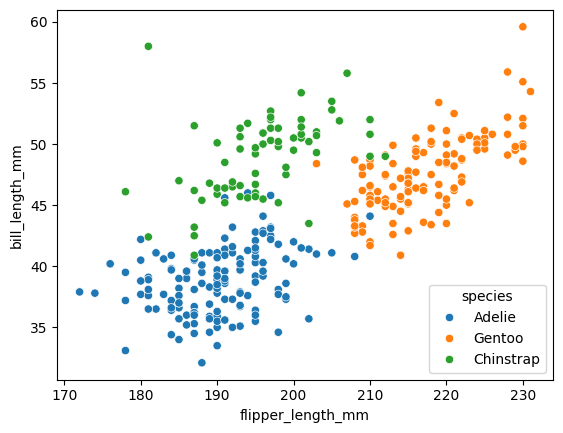

In [74]:
# Produce a 2D scatter plot of two numerical features of your choice and colour the points by species.
sns.scatterplot(data=penguins_complete, x='flipper_length_mm', y='bill_length_mm', hue='species')

<Axes: xlabel='body_mass_g', ylabel='bill_depth_mm'>

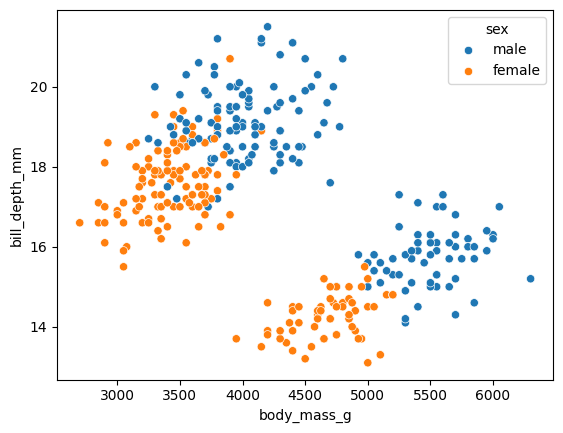

In [77]:
# Produce a 2D scatter plot as above, but use the remaining two features and colour the plot according to sex
sns.scatterplot(data=penguins_complete, x='body_mass_g', y='bill_depth_mm', hue='sex')

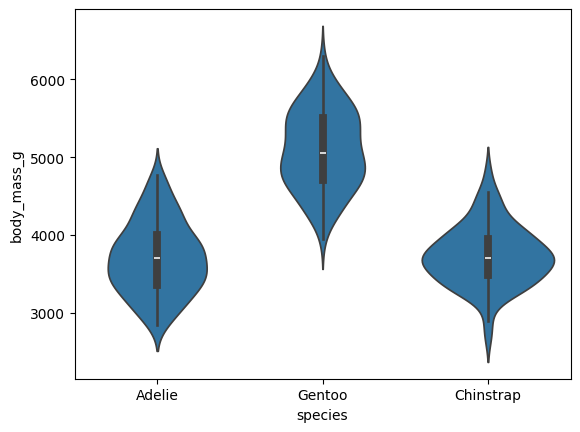

<Axes: xlabel='species', ylabel='body_mass_g'>

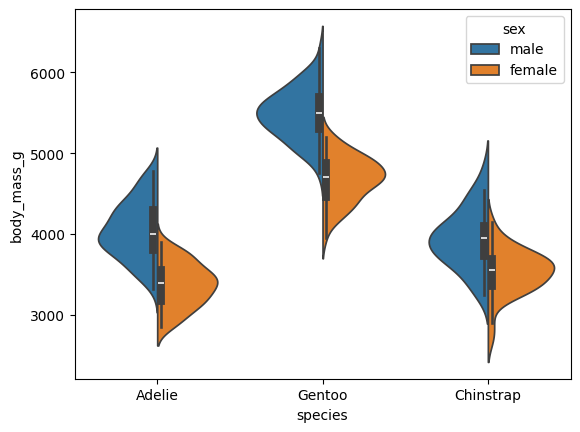

In [80]:
# Produce a violinplot of body mass by species (bonus points if you manage to split the violin by sex ;-))
sns.violinplot(data=penguins_complete, x="species", y="body_mass_g")
plt.show()
sns.violinplot(data=penguins_complete, x="species", y="body_mass_g", hue="sex", split=True)

### 7.1 Questions
1. From the plots above, what can you say about body measurements when comparing male to female penguins?
2. If the penguins in the plots above were single cells, what could the different categories be? What could the species category mean in the context of cells, and what could the numerical categories represent?

In [ ]:
#### The end, well done!